<a href="https://colab.research.google.com/github/dimacio/TP_AM_AirBnB/blob/main/TP_AM1_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Aprendisaje de Maquina 1 - Alojamientos en AirBnB CABA - Modelos

Buscaremos trabajar el dataset de "Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina
" (listings.csv obtenido en [Inside AirBnb](https://insideairbnb.com/get-the-data/)) de forma tal que podamos construir un modelo que nos permita predecir el precio de un alojamiento en AirBnb a partir de ciertos inputs que existen en una publicación del sitio. En este Notebook se evaluan diferentes métodos para tratar de predecir los precios de los alquileres. En una primera instancia se trabajará con los datos tal cual y en segunda instancia con los datos obtenidos tras un proceso de Feature Engineering realizado en el primer Notebook.

## INTEGRANTES:

- Dimas Torres
- Gaston Schvarchman

# Prueba con el dataset original

## Librerias necesarias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Adquisición de datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/posgrado IA/AMq/TP_AirBnB/listings.csv")
pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20240825194531,2024-08-28,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ SPA/ 24-HR SE...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within an hour,100%,100%,t,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1,2,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.581840,-58.424150,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Paid washer \u2013 In building"", ""Microwave""...","$60,390.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,29,59,89,276,2024-08-28,42,6,0,2012-07-02,2024-07-28,4.81,4.93,4.88,4.93,4.98,4.93,4.85,NaN,f,1,1,0,0,0.28
1,14222,https://www.airbnb.com/rooms/14222,20240825194531,2024-08-27,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,Barrio Norte,8,15,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.586170,-58.410360,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Iron"", ""Heating"", ""Wifi"", ""Dish...","$37,001.00",7,40,7,7,1125,1125,7.0,1125.0,NaN,t,19,37,37,37,2024-08-27,120,10,0,2012-07-10,2024-07-07,4.76,4.76,4.76,4.82,4.90,4.87,4.75,NaN,f,7,7,0,0,0.81
2,15074,https://www.airbnb.com/rooms/15074,20240825194531,2024-08-28,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,https://www.airbnb.com/users/show/59338,Monica,2009-12-02,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,2,2,[],f,f,NaN,Nuñez,NaN,-34.538920,-58.465990,Private room in rental unit,Private room,1,NaN,1 bath,NaN,NaN,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",NaN,29,730,29,29,730,730,29.0,730.0,NaN,NaN,0,0,0,0,2024-08-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20240825194531,2024-08-27,city scrape,DUPLEX LOFT 2 - SAN TELMO,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,https

In [ ]:
#convierto price en float
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df = df.dropna(subset=['price'])             # Remove rows with NaN in 'price'


In [ ]:
small_df = np.random.choice(df.index, size=5000, replace=False)
small_df = df.loc[small_df]

In [ ]:
# Calculate the log transformation of the 'price' column
small_df['price_log'] = np.log(small_df['price'])

## Modelos

Debido al amplio rango de la distribución de precios se toma el logarítmo de la variable objetivo.

In [ ]:

# Select features (X) and target variable (y)
X = small_df.drop(['price', 'price_log', 'id'], axis=1)
y = small_df['price_log']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3109243553589882
R-squared: 0.041158369450966736


El desempeño no es óptimo, pasamos a un bosque aleatorio

In [ ]:


# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Squared Error: 0.17504638735872816
Random Forest - R-squared: 0.46018457356621933


Se implementa label enconder en vez de one-hot para probar el impacto la codificación en el resultado

In [ ]:
# Select features (X) and target variable (y)
X = small_df.drop(['price', 'price_log', 'id'], axis=1)
y = small_df['price_log']


# Convert categorical features to numerical using Label Encoding instead of one-hot encoding

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Squared Error: 0.1850801397588383
Random Forest - R-squared: 0.429242065055624


No hay un cambio significativo. Buscamos cuales son los parámetros más importantes según este modelo para comprender mejor su influencia en el precio

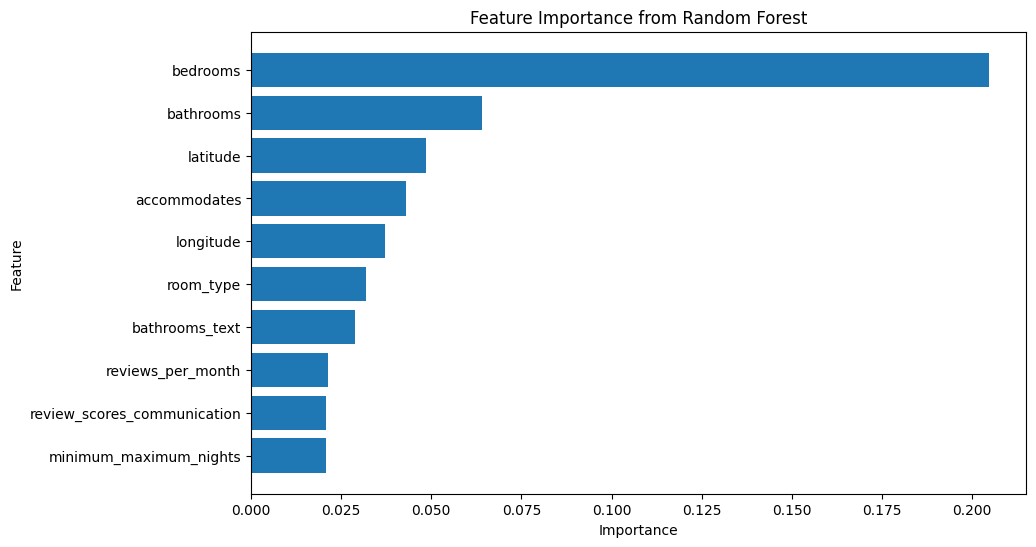

In [ ]:


# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

los rasgos mas importantes son los asociados directamente con la propiedad, como la ubicación y el tamaño

In [ ]:



# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")



XGBoost - Mean Squared Error: 0.18083836562396488
XGBoost - R-squared: 0.4423230268966699


In [ ]:

!pip install catboost

In [ ]:


from catboost import CatBoostRegressor



# Initialize and train the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.05,
                                   depth=6,
                                   loss_function='RMSE',
                                   random_seed=42,
                                   verbose=100) # Set verbose to control the output during training

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))


# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - Mean Squared Error: {mse_catboost}")
print(f"CatBoost - R-squared: {r2_catboost}")

0:	learn: 0.6261957	test: 0.5620449	best: 0.5620449 (0)	total: 51.5ms	remaining: 51.5s
100:	learn: 0.4208993	test: 0.4165817	best: 0.4165817 (100)	total: 298ms	remaining: 2.65s
200:	learn: 0.3760731	test: 0.4055803	best: 0.4055803 (200)	total: 546ms	remaining: 2.17s
300:	learn: 0.3387022	test: 0.4015195	best: 0.4015195 (300)	total: 794ms	remaining: 1.84s
400:	learn: 0.3096669	test: 0.4006980	best: 0.4005403 (388)	total: 1.04s	remaining: 1.56s
500:	learn: 0.2872842	test: 0.4004788	best: 0.4001749 (488)	total: 1.31s	remaining: 1.31s
600:	learn: 0.2663925	test: 0.4004467	best: 0.3998144 (539)	total: 1.57s	remaining: 1.04s
700:	learn: 0.2473915	test: 0.4002093	best: 0.3998144 (539)	total: 1.82s	remaining: 778ms
800:	learn: 0.2321538	test: 0.4003083	best: 0.3998144 (539)	total: 2.07s	remaining: 515ms
900:	learn: 0.2167053	test: 0.3997581	best: 0.3994293 (862)	total: 2.32s	remaining: 255ms
999:	learn: 0.2029872	test: 0.3995369	best: 0.3991883 (983)	total: 2.59s	remaining: 0us

bestTest = 0.3

In [ ]:

data = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'],
    'MSE': [mse, mse_rf, mse_xgb, mse_catboost],
    'R-squared': [r2, r2_rf, r2_xgb, r2_catboost]
}

model_comparison = pd.DataFrame(data)
model_comparison

,Model,MSE,R-squared
0,Decision Tree,0.310924,0.041158
1,Random Forest,0.185080,0.429242
2,XGBoost,0.180838,0.442323
3,CatBoost,0.159351,0.508586


CatBoost presenta una ventaja marginal frente a los otros modelos de arboles, puede deberse al predominio de variables categóricas en el el dataset.

# Prueba sobre dataset con Feature Engineering

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/posgrado IA/AMq/TP_AirBnB/dataset_AirBnB_tratado.csv")
pd.set_option('display.max_columns', None)
df.head()

,description,neighborhood_overview,host_about,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews_ltm,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathroom_shared,number_of_verifications,number_of_amenities,neighbourhood_cleansed,property_type,room_type
0,1,1,1,1.098612,-34.581840,-58.424150,2,1.0,1.0,11.008595,1.386294,777.5,29,276,1.945910,0,0,0,18,913,Palermo,Entire condo,Entire home/apt
1,1,1,1,2.772589,-34.586170,-58.410360,2,1.0,1.0,10.518727,2.079442,40.0,19,37,2.397895,0,0,0,18,379,Palermo,Entire rental unit,Entire home/apt
2,0,1,1,2.639057,-34.614390,-58.376110,4,1.0,1.0,10.763758,1.098612,777.5,0,238,0.000000,0,0,0,18,363,Monserrat,Entire loft,Entire home/apt
3,0,0,1,1.945910,-34.581848,-58.441605,4,1.5,2.0,11.468785,1.098612,365.0,4,191,3.526361,0,0,0,18,1153,Palermo,Entire rental unit,Entire home/apt
4,1,1,1,2.564949,-34.602540,-58.378110,3,1.0,1.0,10.172407,0.693147,10.0,26,173,1.386294,0,0,0,18,602,San Nicolas,Entire rental unit,Entire home/apt


In [ ]:
small_df = np.random.choice(df.index, size=5000, replace=False)
small_df = df.loc[small_df]

## Modelos

In [ ]:

# Select features (X) and target variable (y)
X = small_df.drop(['price'], axis=1)
y = small_df['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.33536740819304955
R-squared: -0.08266045873827244


In [ ]:


# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Squared Error: 0.1462750674919667
Random Forest - R-squared: 0.5277828798985049


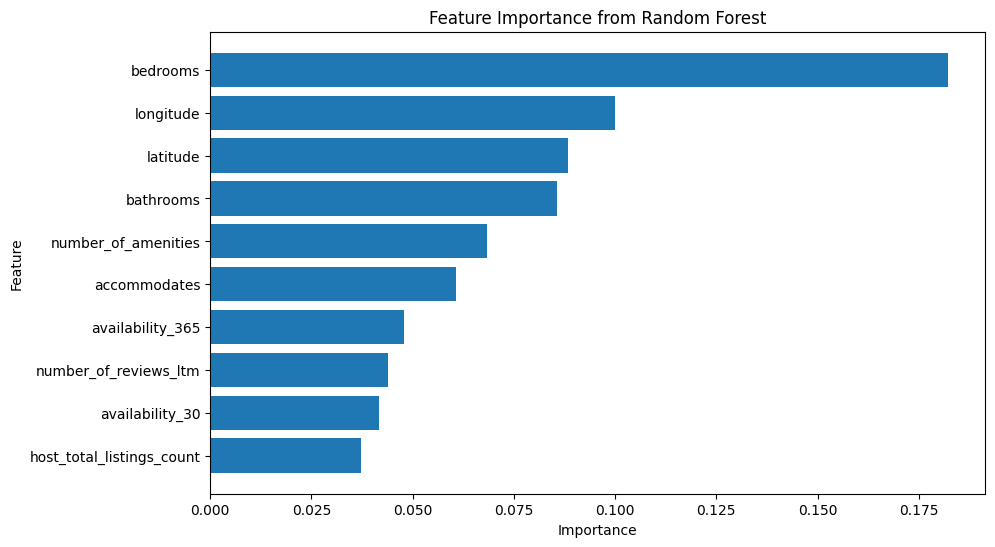

In [ ]:

import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

Vemos que los features de mayor relevancia se conservan en nuestra selección.

In [ ]:


# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")



XGBoost - Mean Squared Error: 0.1692331868088898
XGBoost - R-squared: 0.4536676039826053


In [ ]:


from catboost import CatBoostRegressor



# Initialize and train the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.05,
                                   depth=6,
                                   loss_function='RMSE',
                                   random_seed=42,
                                   verbose=100) # Set verbose to control the output during training

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))


# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - Mean Squared Error: {mse_catboost}")
print(f"CatBoost - R-squared: {r2_catboost}")

0:	learn: 0.6237525	test: 0.5471627	best: 0.5471627 (0)	total: 1.64ms	remaining: 1.64s
100:	learn: 0.4493409	test: 0.3866572	best: 0.3866572 (100)	total: 131ms	remaining: 1.17s
200:	learn: 0.4152069	test: 0.3735524	best: 0.3735524 (200)	total: 258ms	remaining: 1.03s
300:	learn: 0.3903195	test: 0.3704463	best: 0.3702870 (281)	total: 383ms	remaining: 890ms
400:	learn: 0.3720071	test: 0.3693666	best: 0.3688678 (351)	total: 511ms	remaining: 764ms
500:	learn: 0.3560928	test: 0.3689213	best: 0.3683922 (481)	total: 641ms	remaining: 639ms
600:	learn: 0.3419659	test: 0.3696790	best: 0.3683922 (481)	total: 772ms	remaining: 513ms
700:	learn: 0.3292247	test: 0.3693993	best: 0.3683922 (481)	total: 901ms	remaining: 384ms
800:	learn: 0.3160661	test: 0.3699685	best: 0.3683922 (481)	total: 1.03s	remaining: 257ms
900:	learn: 0.3039895	test: 0.3702083	best: 0.3683922 (481)	total: 1.16s	remaining: 128ms
999:	learn: 0.2924476	test: 0.3708258	best: 0.3683922 (481)	total: 1.29s	remaining: 0us

bestTest = 0.3

In [ ]:

data = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'],
    'MSE': [mse, mse_rf, mse_xgb, mse_catboost],
    'R-squared': [r2, r2_rf, r2_xgb, r2_catboost]
}

model_comparison = pd.DataFrame(data)
model_comparison

,Model,MSE,R-squared
0,Decision Tree,0.335367,-0.082660
1,Random Forest,0.146275,0.527783
2,XGBoost,0.169233,0.453668
3,CatBoost,0.135713,0.561881


Comparación con el modelo con los datos originales antes de realizar Future Engineering

In [44]:

data = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'],
    'MSE': [0.310924, 0.185080, 0.180838, 0.159351],
    'R-squared': [0.041158, 0.429242, 0.442323, 0.508586]
}

model_comparison = pd.DataFrame(data)
model_comparison

,Model,MSE,R-squared
0,Decision Tree,0.310924,0.041158
1,Random Forest,0.185080,0.429242
2,XGBoost,0.180838,0.442323
3,CatBoost,0.159351,0.508586


Se repite el entrenamiento del modelo con el dataset completo como verificación

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/posgrado IA/AMq/TP_AirBnB/dataset_AirBnB_tratado.csv")

# Select features (X) and target variable (y)
X = df.drop(['price'], axis=1)
y = df['price']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.05,
                                   depth=6,
                                   loss_function='RMSE',
                                   random_seed=42,
                                   verbose=100) # Set verbose to control the output during training

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))


# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - Mean Squared Error: {mse_catboost}")
print(f"CatBoost - R-squared: {r2_catboost}")

0:	learn: 0.6329578	test: 0.6088739	best: 0.6088739 (0)	total: 3.53ms	remaining: 3.52s
100:	learn: 0.4653534	test: 0.4568487	best: 0.4568487 (100)	total: 279ms	remaining: 2.49s
200:	learn: 0.4483131	test: 0.4455907	best: 0.4455907 (200)	total: 559ms	remaining: 2.22s
300:	learn: 0.4368269	test: 0.4403438	best: 0.4403261 (299)	total: 833ms	remaining: 1.93s
400:	learn: 0.4260198	test: 0.4347448	best: 0.4347448 (400)	total: 1.11s	remaining: 1.66s
500:	learn: 0.4171154	test: 0.4313359	best: 0.4313359 (500)	total: 1.39s	remaining: 1.39s
600:	learn: 0.4104796	test: 0.4289612	best: 0.4289612 (600)	total: 1.67s	remaining: 1.11s
700:	learn: 0.4038048	test: 0.4271212	best: 0.4271212 (700)	total: 1.94s	remaining: 826ms
800:	learn: 0.3983862	test: 0.4259244	best: 0.4259244 (800)	total: 2.2s	remaining: 547ms
900:	learn: 0.3931644	test: 0.4247191	best: 0.4247191 (900)	total: 2.46s	remaining: 271ms
999:	learn: 0.3886971	test: 0.4241652	best: 0.4241437 (987)	total: 2.73s	remaining: 0us

bestTest = 0.42

# Conclusión

## Respecto al dataset

A partir del análisis realizado, podemos plantear las siguientes conclusiones respecto del dataset:

- Contaba con "demasiada información"
  - Muchos de los datos se observaron posteriormente que no aportaban a la hora de buscar ser utilizados para entrenar al modelo
- Contaba con mucha redundancia de features
- Contaba con mucha presencia de missings
- Contaba con un elevado número de outliers
- Contaba con features que contenían lenguaje natural, lo cual nos obligó a tratarlos de una manera sencilla para no irnos del scope de este trabajo

Esta situación generó que al comenzar a trabajar con el mismo, nos vieramos obligados a trabajarlo para lograr obtener un dataset de mayor calidad y, con ello, poder utilizarlo para buscar y entrenar al modelo que mejor performe para la taréa buscada

## Respecto al entrenamiento de modelos y resultados

Comparando las ultimas dos tablas de este Notebook se puede ver que el refinamiento de los features dio como resultado un modelo con mayor capacidad predictiva. Esto se puede deber a que los datos originales incluian características que no tenian un impacto relevante en el precio de los alquileres reduciendo la capacidad del modelo de realizar predicciones acertadas.

Por otro lado se puede notar que el mejor modelo, Catboost, solo alcanzó un R2 del 0.58. Este resultado indicaría que parte de la varianza de la variable objetivo no es explicada con nuestro modelo, para continuar con su optimización se podría explorar el uso de las variables textuales por medio de NLP.

Para finalizar es valioso ver como en lo gráficos de feature importance de ambas aproximaciones se encontraron las coordenadas geográficas. Podría plantearse profundizar el refinamiento del modelo al combinar las coordenadas en un solo descriptor capaz de indicar el impacto de la ubicación en el precio de los alquileres.